In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [2]:
import itertools


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/ulabox_orders_with_categories_partials.csv')





In [5]:
df.head()


customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
0         0      0           45      23.03        4    13   9.46   87.06   
1         0      1           38       1.22        5    13  15.87   75.80   
2         0      2           51      18.08        4    13  16.88   56.75   
3         1      3           57      16.51        1    12  28.81   35.99   
4         1      4           53      18.31        2    11  24.13   60.38   

   Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
0     3.48   0.00     0.00     0.00    0.0    0.0  
1     6.22   2.12     0.00     0.00    0.0    0.0  
2     3.37  16.48     6.53     0.00    0.0    0.0  
3    11.78   4.62     2.87    15.92    0.0    0.0  
4     7.78   7.72     0.00     0.00    0.0    0.0

In [6]:
## Visualisation


In [7]:
df.describe()


customer         order   total_items     discount%       weekday  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    5012.483367  14999.500000     31.739933      8.455495      3.642367   
std     2888.646245   8660.398374     20.576579     14.199350      2.122031   
min        0.000000      0.000000      1.000000    -65.150000      1.000000   
25%     2541.750000   7499.750000     18.000000      1.177500      2.000000   
50%     5043.000000  14999.500000     29.000000      4.160000      3.000000   
75%     7483.000000  22499.250000     41.000000      9.990000      5.000000   
max    10238.000000  29999.000000    298.000000    100.000000      7.000000   

               hour         Food%        Fresh%       Drinks%         Home%  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      15.034667     23.560406     20.227279     23.349235     13.539575   
std        5.717052     21.719824     23.661767     22.523335     17.850282   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       11.000000      7.220000      0.000000      6.710000      0.000000   
50%       15.000000     19.650000     10.930000     17.890000      7.210000   
75%       20.000000     33.260000     35.790000     33.162500     20.002500   
max       23.000000    100.000000    100.000000    100.000000    100.000000   

            Beauty%       Health%         Baby%         Pets%  
count  30000.000000  30000.000000  30000.000000  30000.000000  
mean       5.892949      1.132959     11.096145      1.043087  
std       13.996518      5.307620     24.740364      6.195390  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        6.512500      0.000000      4.172500      0.000000  
max      100.000000    100.000000    100.000000    100.000000

In [8]:
df[df['discount%']<0].sort_values(by='discount%', ascending=True).head(10)

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
23632      7807  23632           11     -65.15        1    10   0.00     0.0   
4554       1487   4554            9     -63.64        7    13   0.00     0.0   
7185       2418   7185            9     -47.26        5     8   0.00     0.0   
768         199    768           14     -39.84        6     8  28.97     0.0   
16098      5379  16098            8     -26.15        3    13   0.00     0.0   
23633      7807  23633           22     -23.98        3    19   7.74     0.0   
22311      7423  22311           12     -23.89        2    11  15.93     0.0   
7183       2418   7183            9     -20.59        3    13   0.00     0.0   
7181       2418   7181            9     -20.59        2    20   0.00     0.0   
7182       2418   7182            9     -20.59        2     8   0.00     0.0   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
23632    86.97  13.03      0.0      0.0   0.00    0.0  
4554    100.00   0.00      0.0      0.0   0.00    0.0  
7185    100.00   0.00      0.0      0.0   0.00    0.0  
768      71.03   0.00      0.0      0.0   0.00    0.0  
16098   100.00   0.00      0.0      0.0   0.00    0.0  
23633    39.63  52.63      0.0      0.0   0.00    0.0  
22311    28.08   0.00      0.0      0.0  55.98    0.0  
7183    100.00   0.00      0.0      0.0   0.00    0.0  
7181    100.00   0.00      0.0      0.0   0.00    0.0  
7182    100.00   0.00      0.0      0.0   0.00    0.0

In [9]:
indices = [56,2459,908,23632,1803,218,592,349]
df.iloc[indices, :]

customer  order  total_items  discount%  weekday  hour  Food%  Fresh%  \
56            4     56           32       3.10        3    19  36.49   53.59   
2459        744   2459           57      14.01        2    22  24.86    7.26   
908         238    908           23       2.98        3    21   8.20   19.14   
23632      7807  23632           11     -65.15        1    10   0.00    0.00   
1803        529   1803            9       5.77        4     7   0.00    0.00   
218          43    218           21       9.87        3    16   0.00    0.00   
592         145    592           15       4.51        5    19   7.48    0.00   
349          70    349           17      27.05        1    15  19.01    0.00   

       Drinks%  Home%  Beauty%  Health%  Baby%  Pets%  
56        9.92   0.00     0.00     0.00   0.00   0.00  
2459     21.37  19.64     1.64     0.72  24.51   0.00  
908      32.27   4.97     4.02     1.89  29.51   0.00  
23632    86.97  13.03     0.00     0.00   0.00   0.00  
1803      0.00  25.56     0.00     0.00   0.00  74.44  
218      23.69  76.31     0.00     0.00   0.00   0.00  
592       0.00  16.22    60.29     0.00   0.00  16.00  
349       0.00   0.00     0.00     0.00  80.99   0.00

In [10]:
data = df.drop(['customer', 'order', 'hour'], axis=1)
frame = data

In [11]:
from sklearn.decomposition import PCA


In [12]:
pca = PCA(n_components=11)
pca.fit(df.values)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
def pca_2d_plot(pca, df):
    fig = plt.figure(figsize=(10,10))
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame(transformed_data, columns=['dim'+str(i) for i in range(1,12)])
    sns.lmplot(x='dim1', y='dim2', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    sns.lmplot(x='dim3', y='dim4', data=data, size=12, fit_reg=False, scatter_kws={'s':8});
    plt.show()

<Figure size 720x720 with 0 Axes>

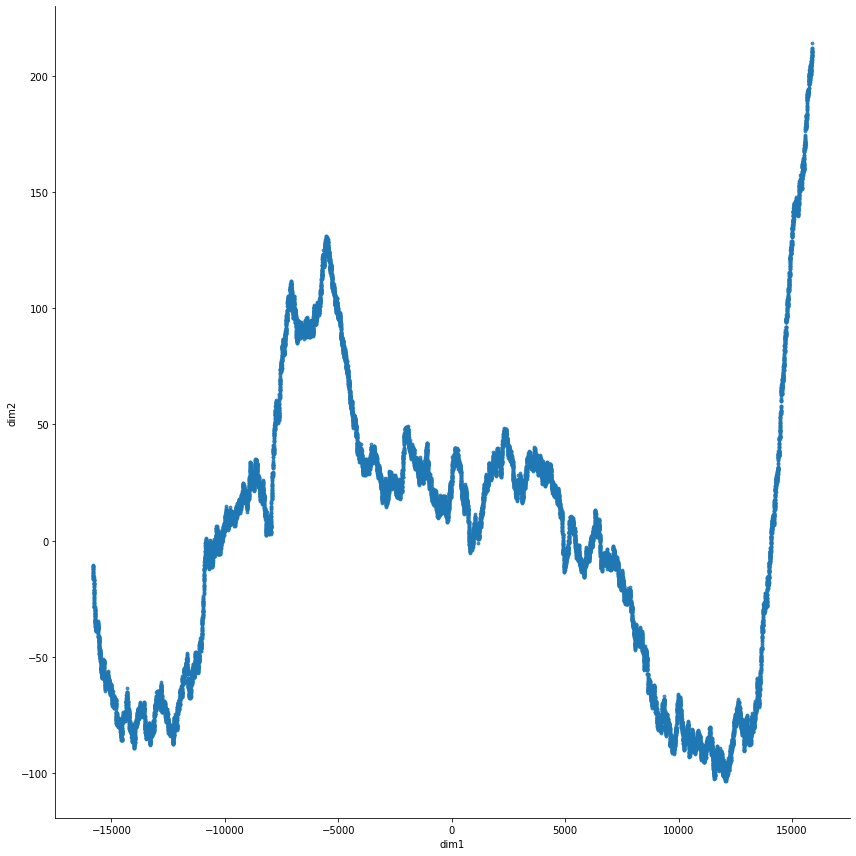

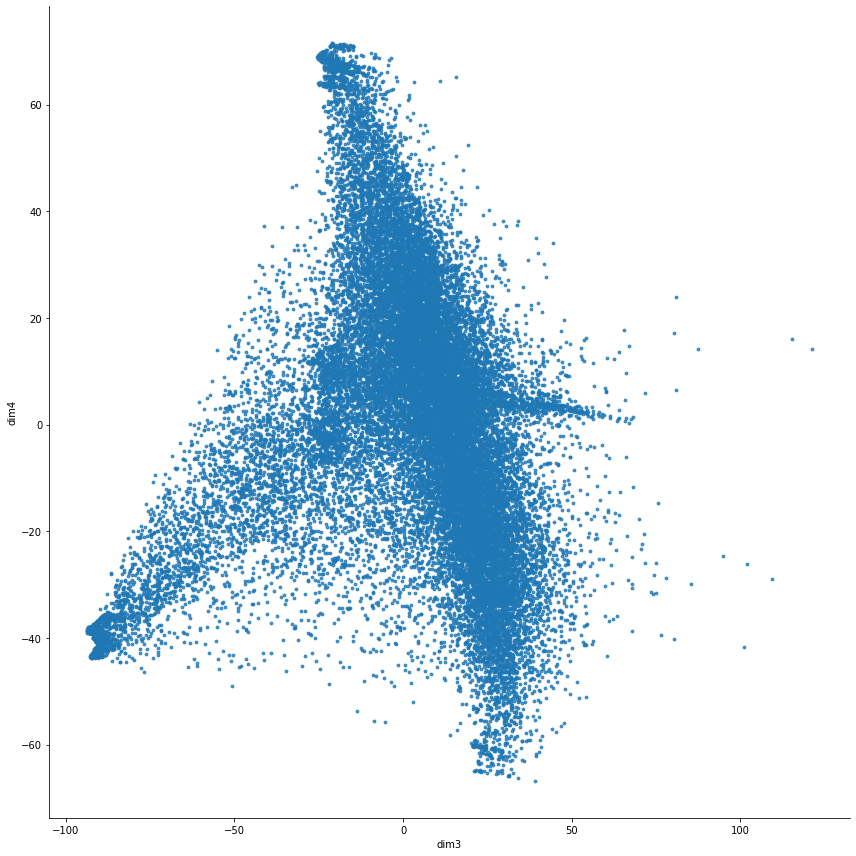

In [14]:
pca_2d_plot(pca, df)


<Figure size 1440x1440 with 0 Axes>

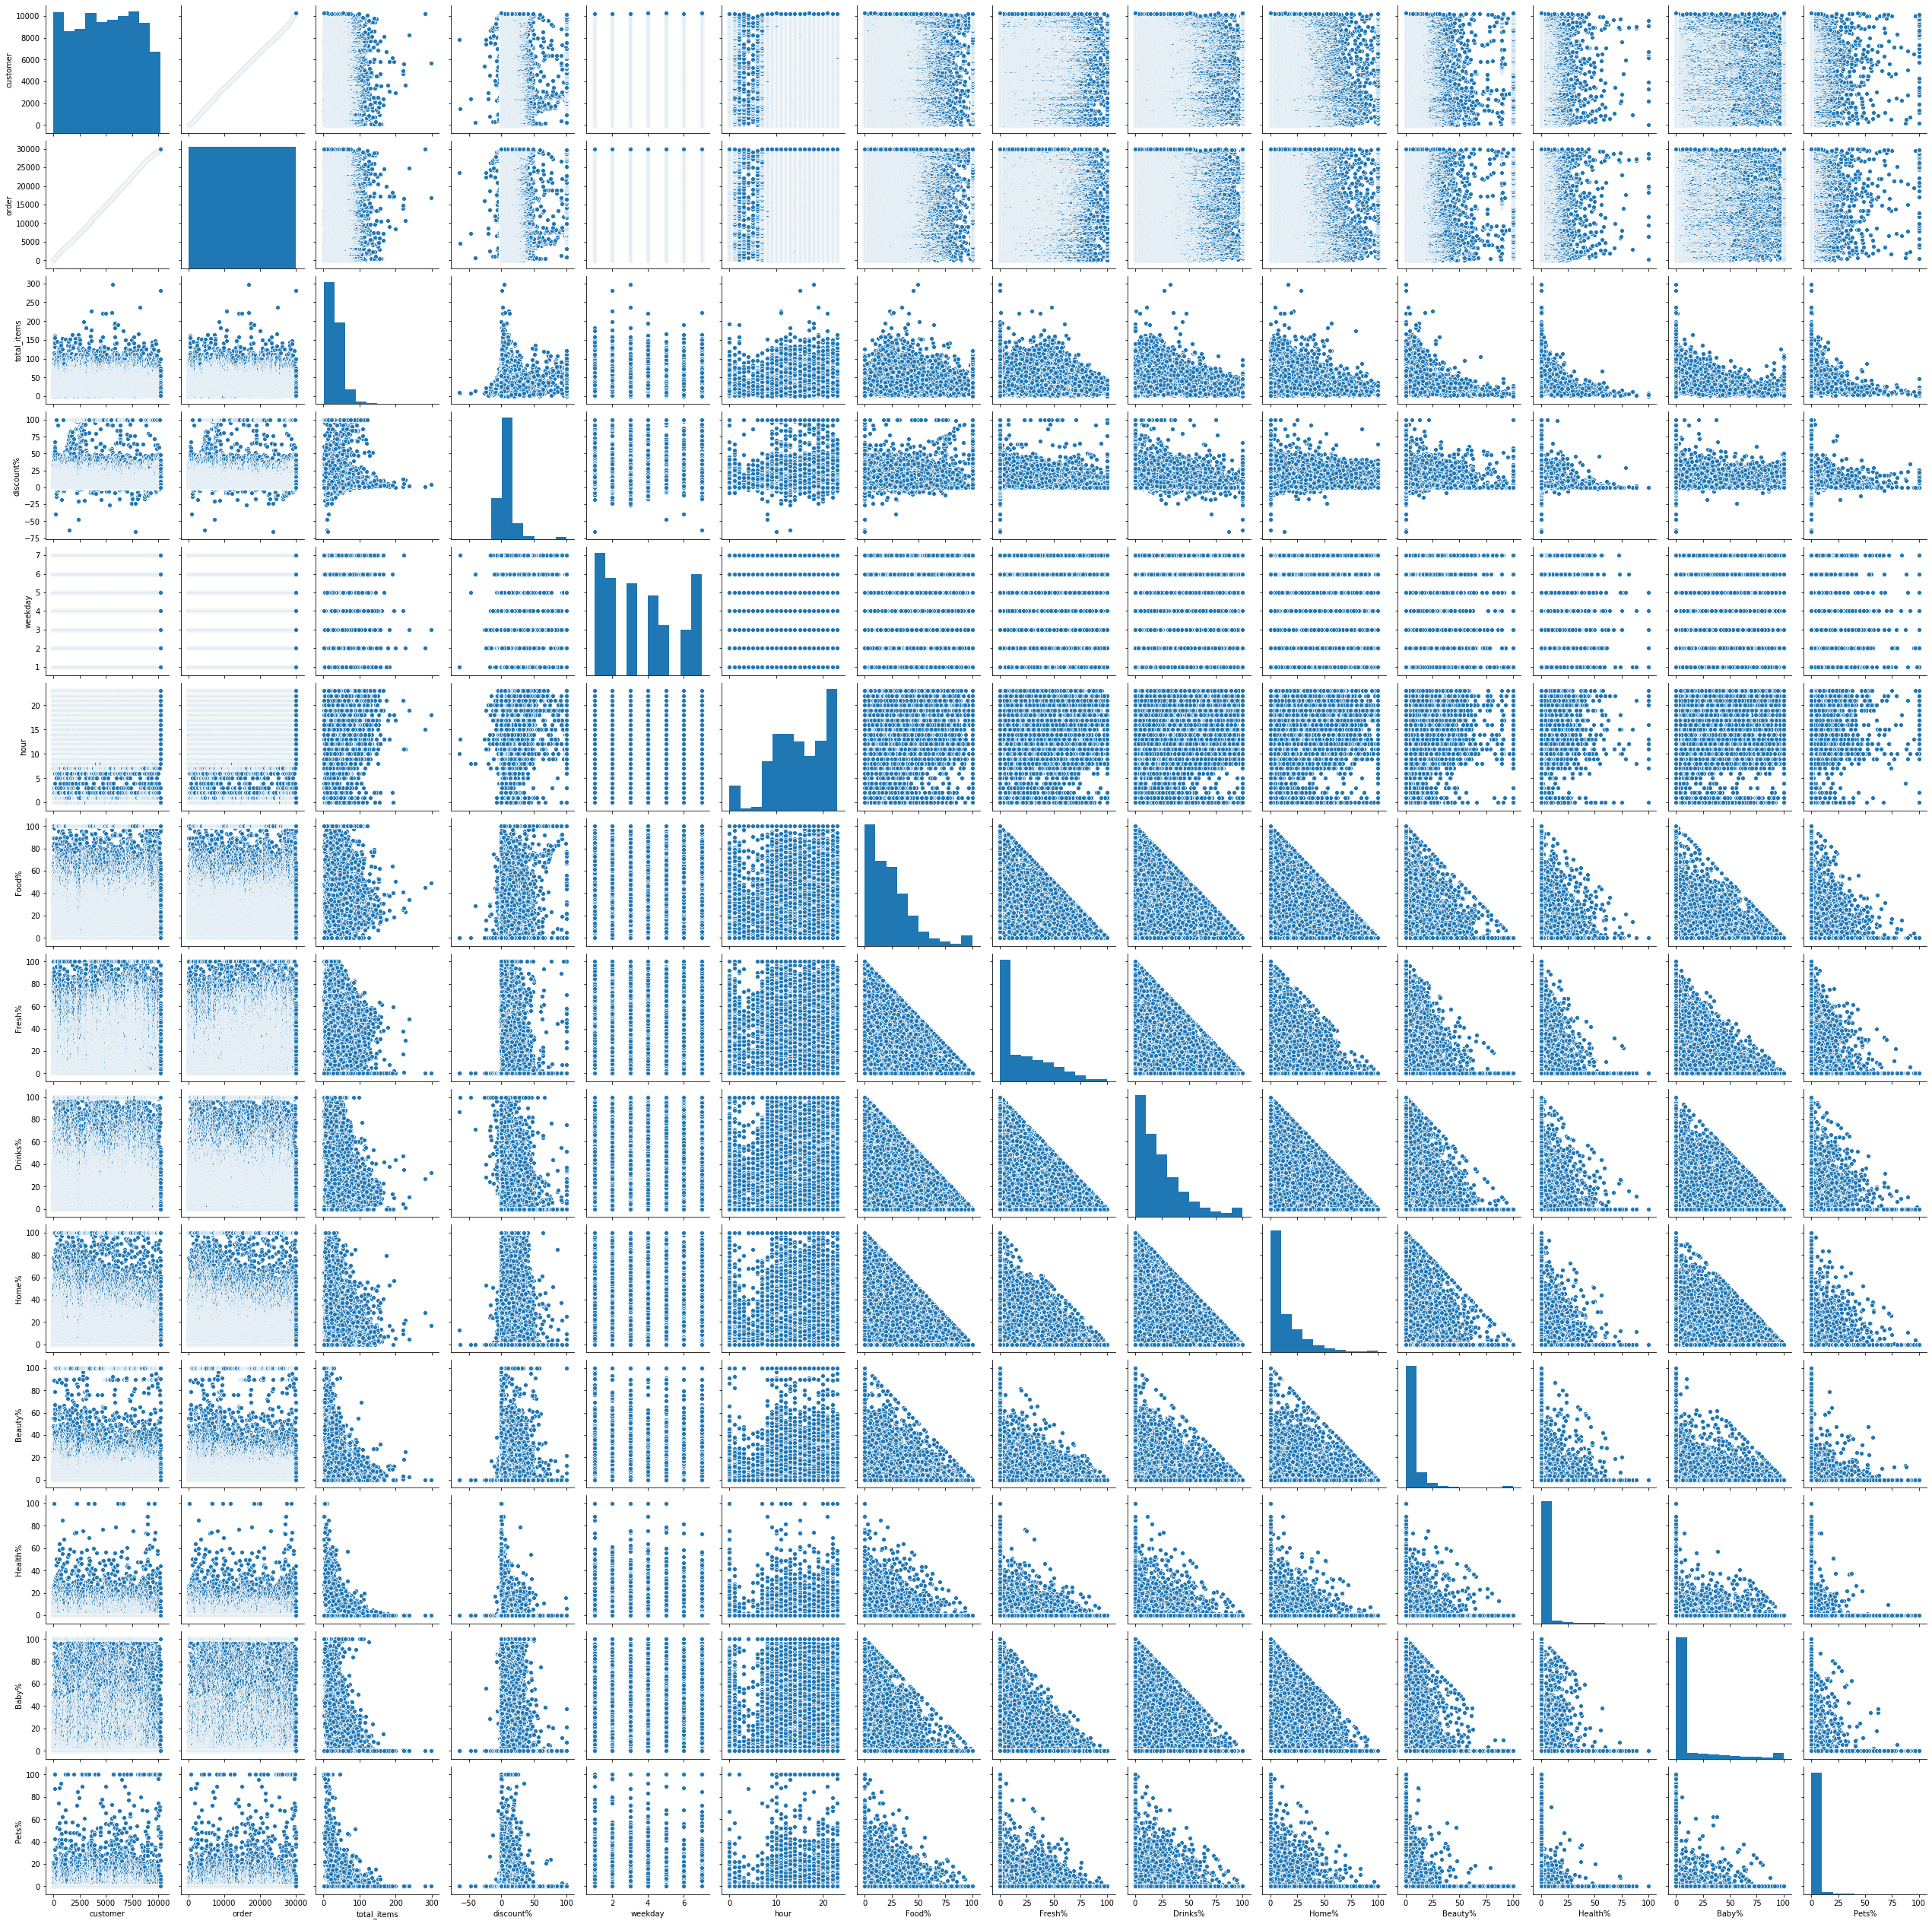

In [15]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(df);
plt.show()

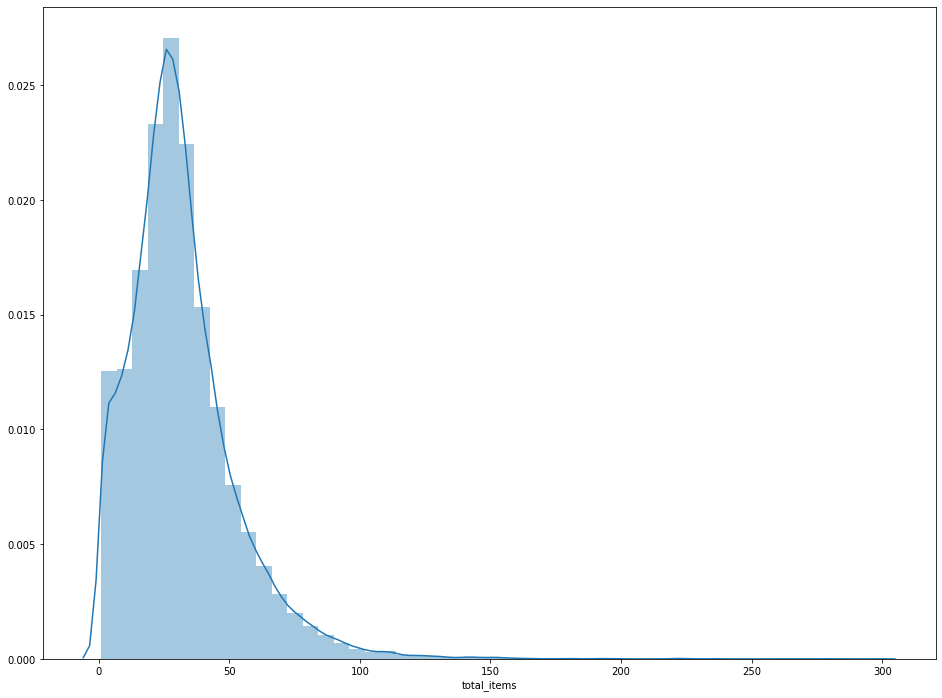

In [16]:
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

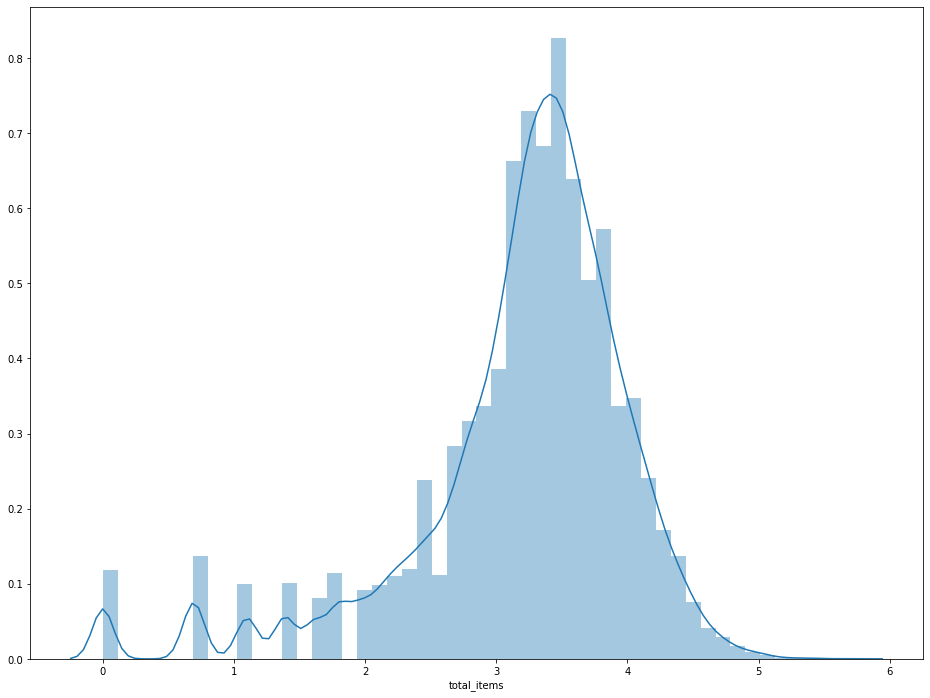

In [34]:
df['total_items'] = np.log(df['total_items'])
fig = plt.figure(figsize=(16,12))
sns.distplot(df['total_items']);
plt.show()

In [28]:
def turkey_outlier_detector(df, cols=None):
    if cols  is None:
        cols = [str(s) for s in df.describe().columns]
        
    q1 = {}
    q3 = {}
    iqd = {}
    r_limit = {}
    l_limit = {}
    outlier_count = {}
    outlier_indices = {}
    for col in cols:
        q1[col] = np.percentile(df[col].values, 25)
        q3[col] = np.percentile(df[col].values, 75)
        iqd[col] = q3[col] - q1[col]
        r_limit[col] = q3[col] + 1.5*iqd[col]
        l_limit[col] = q1[col] - 1.5*iqd[col]
        data_outlier = df[~((df[col]<r_limit[col]).multiply(df[col]>l_limit[col]))]
        outlier_count[col] = data_outlier.shape[0]
        outlier_indices[col] = data_outlier.index
        
    for col in cols:
        print('_'*25)
        print(col+'-'*8+'>'+str(outlier_count[col]))
        
    return outlier_indices

In [29]:
outlier_indices = turkey_outlier_detector(df)


_________________________
customer-------->0
_________________________
order-------->0
_________________________
total_items-------->345
_________________________
discount%-------->2240
_________________________
weekday-------->0
_________________________
hour-------->0
_________________________
Food%-------->1151
_________________________
Fresh%-------->283
_________________________
Drinks%-------->1304
_________________________
Home%-------->1411
_________________________
Beauty%-------->2845
_________________________
Health%-------->28910
_________________________
Baby%-------->6150
_________________________
Pets%-------->28910


In [30]:
df.drop(outlier_indices['total_items'], inplace=True)


In [31]:
frame.drop(outlier_indices['total_items'], inplace=True)


In [32]:
from sklearn.cluster import KMeans


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [34]:
X = scaler.fit_transform(df.values)


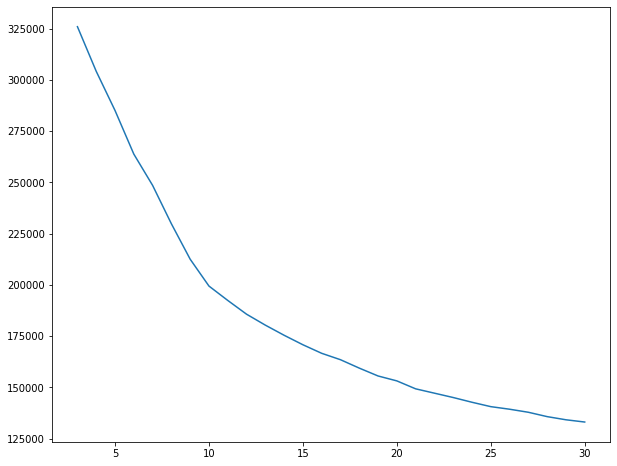

In [35]:
clusters = range(3,31)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(clusters, inertia);
plt.show()


In [36]:
def plot_silhoutte_score(X, max_clusters=20):
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    num_clusters = range(2,max_clusters+1)
    sil_score = []
    for n in num_clusters:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X)
        preds = kmeans.predict(X)
        sil_score.append(silhouette_score(X, preds))
        
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(num_clusters, sil_score)
    plt.show()

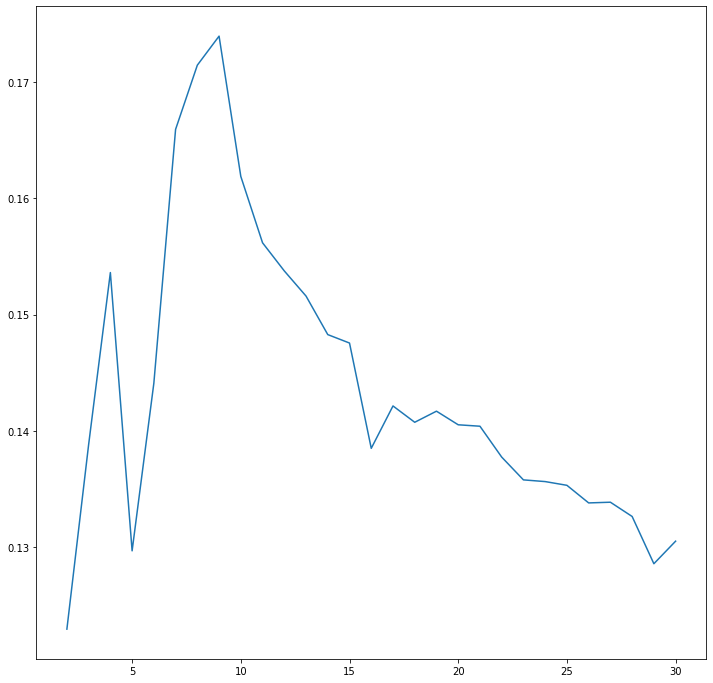

In [37]:
plot_silhoutte_score(X,30)


In [45]:
def under_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    ks = range(1,k_max+1)
    UPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        UPM.append(kmeans.inertia_)
    return UPM

In [38]:
def over_partition_measure(X, k_max):
    from sklearn.cluster import KMeans
    from sklearn.metrics.pairwise import  pairwise_distances
    ks = range(1,k_max+1)
    OPM = []
    for k in ks:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        centers = kmeans.cluster_centers_
        d_min = np.inf
        for pair in list(itertools.combinations(centers, 2)):
            d = pairwise_distances(pair[0].reshape(1,-1), pair[1].reshape(1,-1), metric='euclidean')
            if d<d_min:
                d_min = d
        OPM.append(k/d_min)
    return OPM


In [39]:
def validity_index(X, k_max):
    UPM = under_partition_measure(X, k_max)
    OPM = over_partition_measure(X, k_max)
    UPM_min = np.min(UPM)
    OPM_min = np.min(OPM)
    UPM_max = np.max(UPM)
    OPM_max = np.max(OPM)
    norm_UPM = []
    norm_OPM = []
    for i in range(k_max):
        norm_UPM.append((UPM[i]-UPM_min)/(UPM_max-UPM_min))
        norm_OPM.append((OPM[i]-OPM_min)/(OPM_max-OPM_min))
        
    validity_index = np.array(norm_UPM)+np.array(norm_OPM)
    fig, ax = plt.subplots(figsize=(12,12))
    ax.plot(range(1,k_max+1), validity_index)
    return validity_index


In [40]:
_ = validity_index(X, 30)



NameError: name 'under_partition_measure' is not defined

In [41]:
kmeans_10 = KMeans(n_clusters=10, random_state=42)
kmeans_10.fit(X)
frame['labels'] = kmeans_10.predict(X)


In [42]:
frame[frame['labels']==0].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
18            31      16.49        1  24.27   33.09    16.18   0.00     0.00   
101           15       6.27        7  18.10   62.86     0.00   0.00     0.00   
103           17       4.36        7   2.62   25.94    50.35   0.00     0.00   
106           19       1.84        1   0.00   58.39     6.62  10.44     0.00   
186           27      25.95        1  22.27    0.00    51.86   6.15     0.00   
198            3       0.00        2   0.00    0.00     0.00   0.00     0.00   
222           17       0.76        3   6.00    4.54    56.12   7.20     0.00   
323           34       3.12        1  30.86   14.95    15.70  10.72     8.73   
417           16       4.02        7  12.06    0.00    39.13   5.05    19.55   
443           34       0.00        4  52.49    0.00     4.40  11.69     4.20   

     Health%  Baby%  Pets%  labels  
18     26.47    0.0    0.0       0  
101    19.05    0.0    0.0       0  
103    21.08    0.0    0.0       0  
106    24.55    0.0    0.0       0  
186    19.72    0.0    0.0       0  
198   100.00    0.0    0.0       0  
222    26.14    0.0    0.0       0  
323    19.04    0.0    0.0       0  
417    24.20    0.0    0.0       0  
443    27.22    0.0    0.0       0

In [43]:
frame[frame['labels']==0].describe()


total_items   discount%     weekday       Food%      Fresh%  \
count   576.000000  576.000000  576.000000  576.000000  576.000000   
mean     22.111111    5.392205    3.692708   16.987378   10.611788   
std      11.979177    8.156605    2.151080   15.204556   15.241361   
min       1.000000   -5.540000    1.000000    0.000000    0.000000   
25%      14.000000    0.422500    2.000000    3.910000    0.000000   
50%      21.000000    2.540000    3.000000   14.555000    0.000000   
75%      29.000000    6.712500    6.000000   25.792500   18.090000   
max      69.000000   52.490000    7.000000   77.690000   75.060000   

          Drinks%       Home%     Beauty%     Health%       Baby%       Pets%  \
count  576.000000  576.000000  576.000000  576.000000  576.000000  576.000000   
mean    15.373594   10.585747    7.450573   31.323767    6.628594    0.860556   
std     14.917583   13.246776   11.931442   16.512196   16.033475    3.707244   
min      0.000000    0.000000    0.000000   15.610000    0.000000    0.000000   
25%      2.647500    0.000000    0.000000   20.590000    0.000000    0.000000   
50%     11.810000    5.880000    0.000000   25.555000    0.000000    0.000000   
75%     23.032500   17.145000   10.722500   36.367500    0.000000    0.000000   
max     75.630000   72.470000   65.470000  100.000000   78.610000   36.980000   

       labels  
count   576.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

In [44]:
frame.loc[frame['labels']==0, 'class'] = 'drink_buyers'


In [45]:
frame[frame['labels']==1].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
1            38       1.22        5  15.87   75.80     6.22   2.12     0.00   
2            51      18.08        4  16.88   56.75     3.37  16.48     6.53   
3            57      16.51        1  28.81   35.99    11.78   4.62     2.87   
4            53      18.31        2  24.13   60.38     7.78   7.72     0.00   
6            35      17.26        1  13.01   51.84    29.36   5.79     0.00   
7            12       6.61        4  17.21   67.93    14.86   0.00     0.00   
8            35      22.29        1  15.50   61.65    22.85   0.00     0.00   
9            44      20.39        2  15.29   44.11    12.28   8.90    15.53   
10           17      18.41        4  16.92   70.15    12.93   0.00     0.00   
12           30      18.86        1  22.90   40.36    14.47  10.68     0.00   

    Health%  Baby%  Pets%  labels class  
1      0.00    0.0    0.0       1   NaN  
2      0.00    0.0    0.0       1   NaN  
3     15.92    0.0    0.0       1   NaN  
4      0.00    0.0    0.0       1   NaN  
6      0.00    0.0    0.0       1   NaN  
7      0.00    0.0    0.0       1   NaN  
8      0.00    0.0    0.0       1   NaN  
9      3.90    0.0    0.0       1   NaN  
10     0.00    0.0    0.0       1   NaN  
12    11.58    0.0    0.0       1   NaN

In [46]:
frame[frame['labels']==1].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  7112.000000  7112.000000  7112.000000  7112.000000  7112.000000   
mean     35.445304     7.045564     3.760686    30.733071    18.841019   
std      13.808791     7.722457     2.154120    18.839737    17.960617   
min       1.000000   -18.060000     1.000000     0.000000     0.000000   
25%      26.000000     1.770000     2.000000    17.317500     0.000000   
50%      34.000000     4.550000     3.000000    27.740000    15.805000   
75%      44.000000     9.572500     6.000000    40.612500    31.302500   
max      70.000000    60.890000     7.000000   100.000000    80.310000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  7112.000000  7112.000000  7112.000000  7112.000000  7112.000000   
mean     24.664606    12.654596     5.638930     0.719651     5.949290   
std      15.085766    11.117777     8.690135     2.569726    12.230263   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      13.290000     2.550000     0.000000     0.000000     0.000000   
50%      22.820000    10.590000     0.000000     0.000000     0.000000   
75%      35.150000    20.520000     8.420000     0.000000     3.970000   
max      77.180000    53.130000    50.090000    18.820000    67.460000   

             Pets%  labels  
count  7112.000000  7112.0  
mean      0.628854     1.0  
std       2.930306     0.0  
min       0.000000     1.0  
25%       0.000000     1.0  
50%       0.000000     1.0  
75%       0.000000     1.0  
max      28.170000     1.0

In [47]:
frame.loc[frame['labels']==1, 'class'] = 'loyals_fresh'


In [48]:
frame[frame['labels']==2].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
11             7      15.00        1   0.00   39.93    60.07   0.00      0.0   
220           20       3.66        1   0.00    3.89    68.21   6.99     20.9   
293           17      13.75        3  12.55    0.00    69.47  17.99      0.0   
362            6      10.06        3   0.00    0.00   100.00   0.00      0.0   
383            7       4.16        1   0.00    0.00    81.68  18.32      0.0   
392           28      17.93        3   4.35    0.00    95.65   0.00      0.0   
439           12       2.18        5   0.00    0.00    56.03   0.00      0.0   
451           12       6.44        4  20.26    0.00    79.74   0.00      0.0   
564            9       2.47        1   0.00    0.00   100.00   0.00      0.0   
565            8       0.00        1   0.00    0.00   100.00   0.00      0.0   

     Health%  Baby%  Pets%  labels class  
11       0.0   0.00    0.0       2   NaN  
220      0.0   0.00    0.0       2   NaN  
293      0.0   0.00    0.0       2   NaN  
362      0.0   0.00    0.0       2   NaN  
383      0.0   0.00    0.0       2   NaN  
392      0.0   0.00    0.0       2   NaN  
439      0.0  43.97    0.0       2   NaN  
451      0.0   0.00    0.0       2   NaN  
564      0.0   0.00    0.0       2   NaN  
565      0.0   0.00    0.0       2   NaN

In [49]:
frame[frame['labels']==2].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  2883.000000  2883.000000  2883.000000  2883.000000  2883.000000   
mean     20.843913     5.347399     3.464794     9.549830     4.306223   
std      10.823384     8.023901     1.971798    10.830793     8.533392   
min       1.000000   -65.150000     1.000000     0.000000     0.000000   
25%      13.000000     0.230000     2.000000     0.000000     0.000000   
50%      20.000000     3.200000     3.000000     6.210000     0.000000   
75%      28.000000     7.645000     5.000000    16.440000     4.730000   
max      68.000000    77.130000     7.000000    54.000000    49.070000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  2883.000000  2883.000000  2883.000000  2883.000000  2883.000000   
mean     73.863417     7.127711     2.126185     0.254766     2.208599   
std      18.141427    10.022182     5.603552     1.642875     7.773019   
min      33.530000     0.000000     0.000000     0.000000     0.000000   
25%      58.890000     0.000000     0.000000     0.000000     0.000000   
50%      71.100000     0.000000     0.000000     0.000000     0.000000   
75%      91.270000    12.135000     0.000000     0.000000     0.000000   
max     100.000000    44.890000    45.570000    18.860000    50.430000   

             Pets%  labels  
count  2883.000000  2883.0  
mean      0.402588     2.0  
std       2.564500     0.0  
min       0.000000     2.0  
25%       0.000000     2.0  
50%       0.000000     2.0  
75%       0.000000     2.0  
max      27.440000     2.0

In [50]:
frame.loc[frame['labels']==2, 'class'] = 'loyals_grocery'


In [51]:
frame[frame['labels']==3].head(10)


total_items  discount%  weekday   Food%  Fresh%  Drinks%  Home%  \
11626            6      25.10        3  100.00     0.0     0.00   0.00   
11703            6       0.00        2  100.00     0.0     0.00   0.00   
11790           22       0.00        2   93.22     0.0     0.00   0.00   
11964            2       3.84        1  100.00     0.0     0.00   0.00   
12138            4       0.00        1  100.00     0.0     0.00   0.00   
12386            4      10.02        1  100.00     0.0     0.00   0.00   
12605            4      35.07        4  100.00     0.0     0.00   0.00   
12839            9       0.36        2  100.00     0.0     0.00   0.00   
12850           26       0.00        5   80.67     0.0     6.57  12.76   
12859           15       7.72        2   88.53     0.0     0.00  11.47   

       Beauty%  Health%  Baby%  Pets%  labels class  
11626      0.0      0.0    0.0   0.00       3   NaN  
11703      0.0      0.0    0.0   0.00       3   NaN  
11790      0.0      0.0    0.0   6.78       3   NaN  
11964      0.0      0.0    0.0   0.00       3   NaN  
12138      0.0      0.0    0.0   0.00       3   NaN  
12386      0.0      0.0    0.0   0.00       3   NaN  
12605      0.0      0.0    0.0   0.00       3   NaN  
12839      0.0      0.0    0.0   0.00       3   NaN  
12850      0.0      0.0    0.0   0.00       3   NaN  
12859      0.0      0.0    0.0   0.00       3   NaN

In [52]:
frame[frame['labels']==3].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  5894.000000  5894.000000  5894.000000  5894.000000  5894.000000   
mean     33.041228     6.375136     3.523414    37.730762    14.031486   
std      13.863526     7.562954     2.083375    21.842066    13.184265   
min       1.000000   -11.990000     1.000000     0.000000     0.000000   
25%      24.000000     1.520000     2.000000    22.370000     0.000000   
50%      31.000000     4.000000     3.000000    33.685000    12.230000   
75%      42.000000     8.427500     5.000000    47.807500    24.977500   
max      70.000000    63.330000     7.000000   100.000000    50.500000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  5894.000000  5894.000000  5894.000000  5894.000000  5894.000000   
mean     23.688729    12.861544     5.421461     0.648950     4.817053   
std      14.832150    12.058734     8.265680     2.459496    11.208095   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      12.442500     1.782500     0.000000     0.000000     0.000000   
50%      22.790000    10.170000     0.000000     0.000000     0.000000   
75%      33.987500    20.877500     8.340000     0.000000     0.000000   
max      74.830000    58.660000    52.150000    18.580000    63.910000   

             Pets%  labels  
count  5894.000000  5894.0  
mean      0.664113     3.0  
std       2.970293     0.0  
min       0.000000     3.0  
25%       0.000000     3.0  
50%       0.000000     3.0  
75%       0.000000     3.0  
max      27.900000     3.0

In [53]:
frame.loc[frame['labels']==3, 'class'] = 'beauty_concious'


In [54]:
frame[frame['labels']==4].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
112           26       6.93        3   4.93    0.00     0.00  34.17    54.72   
371            5       1.14        7  11.17    0.00     0.00   0.00    88.83   
465            7      15.73        7  15.93    0.00    21.16   0.00    62.91   
545           15      60.47        7   2.65   20.54     0.00   0.00    58.90   
569            5      58.38        5   0.00    0.00     0.00   0.00   100.00   
577            1       9.64        6   0.00    0.00     0.00   0.00   100.00   
590           12       0.66        2   0.00    0.00     4.94   0.00    78.59   
592           15       4.51        5   7.48    0.00     0.00  16.22    60.29   
594           13       2.34        7  19.56    0.00     0.00   9.32    58.94   
654           27      26.38        3   0.00    0.00     4.76  34.10    53.87   

     Health%  Baby%  Pets%  labels class  
112     6.17   0.00   0.00       4   NaN  
371     0.00   0.00   0.00       4   NaN  
465     0.00   0.00   0.00       4   NaN  
545     0.00  17.91   0.00       4   NaN  
569     0.00   0.00   0.00       4   NaN  
577     0.00   0.00   0.00       4   NaN  
590     0.00   0.00  16.47       4   NaN  
592     0.00   0.00  16.00       4   NaN  
594     0.00   0.00  12.18       4   NaN  
654     7.26   0.00   0.00       4   NaN

In [55]:
frame[frame['labels']==4].describe()


total_items   discount%     weekday       Food%      Fresh%  \
count   605.000000  605.000000  605.000000  605.000000  605.000000   
mean      7.573554    8.986579    3.157025    3.493107    1.304959   
std       9.195627   12.461655    2.082759    8.603029    5.640422   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%       1.000000    0.000000    1.000000    0.000000    0.000000   
50%       3.000000    5.270000    3.000000    0.000000    0.000000   
75%      12.000000    9.990000    5.000000    0.000000    0.000000   
max      47.000000  100.000000    7.000000   49.800000   50.240000   

          Drinks%       Home%     Beauty%     Health%       Baby%       Pets%  \
count  605.000000  605.000000  605.000000  605.000000  605.000000  605.000000   
mean     2.634116    3.280529   85.966744    0.390942    1.188926    0.155124   
std      7.741937    8.679429   18.473673    2.463111    6.172130    1.525977   
min      0.000000    0.000000   43.750000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   70.960000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000  100.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000  100.000000    0.000000    0.000000    0.000000   
max     47.260000   44.260000  100.000000   23.970000   50.840000   18.840000   

       labels  
count   605.0  
mean      4.0  
std       0.0  
min       4.0  
25%       4.0  
50%       4.0  
75%       4.0  
max       4.0

In [56]:
frame.loc[frame['labels']==4, 'class'] = 'health_concious'


In [57]:
frame[frame['labels']==5].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%   Home%  Beauty%  \
38             3      33.33        2   0.00    0.00     0.00  100.00     0.00   
40             3       0.00        1  22.76    0.00     0.00   77.24     0.00   
52             1       0.00        1   0.00    0.00     0.00  100.00     0.00   
54             3      30.06        1   0.00    0.00     0.00  100.00     0.00   
93            17      30.60        1  24.87    0.00    15.77   48.51    10.85   
111           23      15.94        1   9.37    0.00     0.00   42.45    48.18   
135           25      10.98        7   0.00   12.29    25.54   51.25     6.73   
148           17       0.81        3  18.39    0.00    32.70   43.74     5.17   
151           22       0.74        1  15.56    0.00    27.22   46.60     7.15   
162           25       0.00        1   6.88    0.00    24.65   43.58     3.70   

     Health%  Baby%  Pets%  labels class  
38      0.00   0.00   0.00       5   NaN  
40      0.00   0.00   0.00       5   NaN  
52      0.00   0.00   0.00       5   NaN  
54      0.00   0.00   0.00       5   NaN  
93      0.00   0.00   0.00       5   NaN  
111     0.00   0.00   0.00       5   NaN  
135     4.19   0.00   0.00       5   NaN  
148     0.00   0.00   0.00       5   NaN  
151     0.00   3.47   0.00       5   NaN  
162     0.00   0.00  21.19       5   NaN

In [58]:
frame[frame['labels']==5].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean     22.954118    13.535471     3.474902    10.910537     4.559945   
std      11.587449    11.108935     2.098019    11.474843     9.189103   
min       1.000000   -23.980000     1.000000     0.000000     0.000000   
25%      15.000000     4.532500     2.000000     0.000000     0.000000   
50%      22.000000    11.985000     3.000000     7.925000     0.000000   
75%      29.000000    19.910000     5.000000    18.057500     5.157500   
max      69.000000    86.090000     7.000000    57.030000    61.540000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  2550.000000  2550.000000  2550.000000  2550.000000  2550.000000   
mean     16.732631    56.933416     5.327741     0.479969     4.547404   
std      15.030638    19.544297     9.016210     2.224993    11.191909   
min       0.000000    18.630000     0.000000     0.000000     0.000000   
25%       0.000000    42.815000     0.000000     0.000000     0.000000   
50%      14.645000    51.515000     0.000000     0.000000     0.000000   
75%      27.500000    66.187500     7.815000     0.000000     0.000000   
max      61.150000   100.000000    53.310000    20.030000    58.490000   

             Pets%  labels  
count  2550.000000  2550.0  
mean      0.439741     5.0  
std       2.627868     0.0  
min       0.000000     5.0  
25%       0.000000     5.0  
50%       0.000000     5.0  
75%       0.000000     5.0  
max      28.310000     5.0

In [59]:
frame.loc[frame['labels']==5, 'class'] = 'loyals'


In [60]:
frame[frame['labels']==6].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
115           24      16.27        4  17.02    3.77     3.12   0.00      0.0   
238            6      36.83        1   9.83    0.00     0.00  14.64      0.0   
314            4       0.28        1   0.00    0.00     5.64   0.00      0.0   
315            7       0.00        2   0.00    0.00     3.80   0.00      0.0   
317           13      19.25        7  12.43    0.00    19.22   0.00      0.0   
318            2       0.00        1   0.00    0.00     0.00   0.00      0.0   
349           17      27.05        1  19.01    0.00     0.00   0.00      0.0   
359            2       0.00        1   0.00    0.00     0.00   0.00      0.0   
373            4       8.75        1   0.00   12.48     0.00   0.00      0.0   
430           13       7.85        2   3.50    0.00     0.00   0.00      0.0   

     Health%   Baby%  Pets%  labels class  
115      0.0   76.10    0.0       6   NaN  
238      0.0   75.54    0.0       6   NaN  
314      0.0   94.36    0.0       6   NaN  
315      0.0   96.20    0.0       6   NaN  
317      0.0   68.36    0.0       6   NaN  
318      0.0  100.00    0.0       6   NaN  
349      0.0   80.99    0.0       6   NaN  
359      0.0  100.00    0.0       6   NaN  
373      0.0   87.52    0.0       6   NaN  
430      0.0   96.50    0.0       6   NaN

In [61]:
frame[frame['labels']==6].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean     11.722553     8.013451     3.766398     4.133771     2.341571   
std       9.232314    10.642883     2.260602     7.376975     6.114433   
min       1.000000   -23.890000     1.000000     0.000000     0.000000   
25%       4.000000     0.000000     2.000000     0.000000     0.000000   
50%      10.000000     2.630000     3.000000     0.000000     0.000000   
75%      17.000000    13.340000     6.000000     5.915000     0.000000   
max      70.000000    60.180000     7.000000    49.490000    45.850000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  2851.000000  2851.000000  2851.000000  2851.000000  2851.000000   
mean      7.733893     4.600863     2.109144     0.355128    78.363139   
std      10.658964     8.440038     5.663486     2.032048    20.222143   
min       0.000000     0.000000     0.000000     0.000000    23.800000   
25%       0.000000     0.000000     0.000000     0.000000    59.915000   
50%       0.000000     0.000000     0.000000     0.000000    80.890000   
75%      13.665000     5.995000     0.000000     0.000000   100.000000   
max      50.970000    46.210000    45.740000    18.670000   100.000000   

             Pets%  labels  
count  2851.000000  2851.0  
mean      0.181066     6.0  
std       1.697260     0.0  
min       0.000000     6.0  
25%       0.000000     6.0  
50%       0.000000     6.0  
75%       0.000000     6.0  
max      28.330000     6.0

In [62]:
frame.loc[frame['labels']==6, 'class'] = 'grocery_shoppers'


In [63]:
frame[frame['labels']==7].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
435           38      49.11        1  98.15    0.00     1.85   0.00     0.00   
965           23     100.00        2  20.50   41.56    22.99   9.03     5.92   
966           31     100.00        4  50.49   23.49    26.02   0.00     0.00   
967           34     100.00        2  32.35   55.40     4.90   0.00     0.00   
968           23     100.00        1  56.20   27.88    15.92   0.00     0.00   
969           67     100.00        4  68.45    0.00     6.82   0.00    21.58   
970           10     100.00        1  20.62   54.58    24.80   0.00     0.00   
971            8     100.00        4  49.08   37.35    13.57   0.00     0.00   
972           10     100.00        1  76.62    0.00    23.38   0.00     0.00   
973            9     100.00        1  77.53    0.00    22.47   0.00     0.00   

     Health%  Baby%  Pets%  labels class  
435      0.0   0.00    0.0       7   NaN  
965      0.0   0.00    0.0       7   NaN  
966      0.0   0.00    0.0       7   NaN  
967      0.0   7.36    0.0       7   NaN  
968      0.0   0.00    0.0       7   NaN  
969      0.0   0.00    0.0       7   NaN  
970      0.0   0.00    0.0       7   NaN  
971      0.0   0.00    0.0       7   NaN  
972      0.0   0.00    0.0       7   NaN  
973      0.0   0.00    0.0       7   NaN

In [64]:
frame[frame['labels']==7].describe()


total_items   discount%     weekday       Food%      Fresh%  \
count   433.000000  433.000000  433.000000  433.000000  433.000000   
mean     38.789838   93.803949    3.528868   92.479099    3.110808   
std      18.426523   14.518201    2.017223   20.158116   13.672806   
min       1.000000   37.590000    1.000000    0.000000    0.000000   
25%      24.000000  100.000000    2.000000  100.000000    0.000000   
50%      38.000000  100.000000    3.000000  100.000000    0.000000   
75%      56.000000  100.000000    5.000000  100.000000    0.000000   
max      70.000000  100.000000    7.000000  100.000000  100.000000   

          Drinks%       Home%     Beauty%     Health%       Baby%       Pets%  \
count  433.000000  433.000000  433.000000  433.000000  433.000000  433.000000   
mean     2.349931    0.951409    0.537090    0.074434    0.376236    0.113418   
std      7.983663    4.808204    3.139044    0.947992    3.046832    1.523085   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     75.020000   37.410000   33.070000   15.420000   37.220000   24.080000   

       labels  
count   433.0  
mean      7.0  
std       0.0  
min       7.0  
25%       7.0  
50%       7.0  
75%       7.0  
max       7.0

In [65]:
frame.loc[frame['labels']==7, 'class'] = 'home_decorators'


In [66]:
frame[frame['labels']==8].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
0             45      23.03        4   9.46   87.06     3.48   0.00      0.0   
5              8      23.89        4   0.00  100.00     0.00   0.00      0.0   
31             3       0.00        1   0.00  100.00     0.00   0.00      0.0   
41             6       0.00        1   0.00  100.00     0.00   0.00      0.0   
47            23       0.65        3   8.23   82.63     9.14   0.00      0.0   
48            20       5.49        1   0.00   86.42    12.31   1.27      0.0   
66             4       0.00        2   0.00  100.00     0.00   0.00      0.0   
75             3       0.00        5   0.00  100.00     0.00   0.00      0.0   
102            1       0.00        1   0.00  100.00     0.00   0.00      0.0   
105           13       0.00        1   5.35   89.89     4.77   0.00      0.0   

     Health%  Baby%  Pets%  labels class  
0        0.0    0.0    0.0       8   NaN  
5        0.0    0.0    0.0       8   NaN  
31       0.0    0.0    0.0       8   NaN  
41       0.0    0.0    0.0       8   NaN  
47       0.0    0.0    0.0       8   NaN  
48       0.0    0.0    0.0       8   NaN  
66       0.0    0.0    0.0       8   NaN  
75       0.0    0.0    0.0       8   NaN  
102      0.0    0.0    0.0       8   NaN  
105      0.0    0.0    0.0       8   NaN

In [67]:
frame[frame['labels']==8].describe()


total_items    discount%      weekday        Food%       Fresh%  \
count  5371.000000  5371.000000  5371.000000  5371.000000  5371.000000   
mean     34.382796     4.873454     3.769875    17.918039    57.946373   
std      14.340882     6.455826     2.119149    11.132397    16.054991   
min       1.000000     0.000000     1.000000     0.000000    20.820000   
25%      25.000000     0.820000     2.000000     9.655000    45.940000   
50%      33.000000     2.780000     4.000000    17.050000    55.650000   
75%      43.000000     6.410000     6.000000    25.305000    68.150000   
max      70.000000    76.280000     7.000000    59.780000   100.000000   

           Drinks%        Home%      Beauty%      Health%        Baby%  \
count  5371.000000  5371.000000  5371.000000  5371.000000  5371.000000   
mean     12.332404     5.840333     2.820735     0.458712     2.039536   
std      10.221006     7.558016     5.245378     2.038217     6.696807   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.615000     0.000000     0.000000     0.000000     0.000000   
50%      10.520000     2.950000     0.000000     0.000000     0.000000   
75%      18.215000     9.105000     3.975000     0.000000     0.000000   
max      53.510000    45.800000    47.990000    17.170000    55.650000   

             Pets%  labels  
count  5371.000000  5371.0  
mean      0.555507     8.0  
std       2.668702     0.0  
min       0.000000     8.0  
25%       0.000000     8.0  
50%       0.000000     8.0  
75%       0.000000     8.0  
max      27.270000     8.0

In [68]:
frame.loc[frame['labels']==8, 'class'] = 'pet_lovers'


In [69]:
frame[frame['labels']==9].head(10)


total_items  discount%  weekday  Food%  Fresh%  Drinks%  Home%  Beauty%  \
461            43       5.75        2  22.37     0.0    25.56   3.42    12.18   
551            12      25.04        2   0.00     0.0     0.00   0.00     0.00   
579            14      11.36        5   0.00     0.0    67.13   0.00     0.00   
622            28       2.08        5  21.41     0.0    21.76   8.53     5.68   
655            16      12.64        3   0.00     0.0     0.00   0.00    12.52   
1228           18       0.00        6   0.00     0.0     0.00   0.00    47.25   
1330           15      14.01        6   0.00     0.0    22.24  32.54     9.44   
1802            7       3.82        3   0.00     0.0     0.00   0.00     0.00   
1803            9       5.77        4   0.00     0.0     0.00  25.56     0.00   
1842           12      10.03        6   0.00     0.0     0.00   0.00    11.70   

      Health%  Baby%   Pets%  labels class  
461      2.81   0.00   33.65       9   NaN  
551      0.00   0.00  100.00       9   NaN  
579      0.00   0.00   32.87       9   NaN  
622      0.00   0.00   42.61       9   NaN  
655      0.00   0.00   87.48       9   NaN  
1228     0.00   0.00   52.75       9   NaN  
1330     0.00   0.00   35.78       9   NaN  
1802     0.00  62.55   37.45       9   NaN  
1803     0.00   0.00   74.44       9   NaN  
1842     0.00   0.00   88.30       9   NaN

In [70]:
frame[frame['labels']==9].describe()


total_items   discount%     weekday       Food%      Fresh%  \
count   290.000000  290.000000  290.000000  290.000000  290.000000   
mean     19.072414    7.811793    3.558621   11.531931    8.397310   
std      11.356976    8.974142    2.064281   12.512922   14.097625   
min       1.000000  -12.790000    1.000000    0.000000    0.000000   
25%      10.250000    0.622500    2.000000    0.000000    0.000000   
50%      18.000000    4.510000    3.000000    7.725000    0.000000   
75%      26.000000   12.317500    5.000000   19.565000   11.445000   
max      66.000000   42.420000    7.000000   55.810000   62.880000   

          Drinks%       Home%     Beauty%     Health%       Baby%       Pets%  \
count  290.000000  290.000000  290.000000  290.000000  290.000000  290.000000   
mean    12.649793    9.491483    3.463000    0.538207    2.107310   51.820517   
std     14.377321   12.786237    7.967627    3.008871    8.276859   24.167945   
min      0.000000    0.000000    0.000000    0.000000    0.000000   26.170000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   33.442500   
50%      8.205000    3.665000    0.000000    0.000000    0.000000   42.125000   
75%     20.582500   14.782500    2.700000    0.000000    0.000000   62.530000   
max     67.130000   63.630000   47.250000   26.290000   62.550000  100.000000   

       labels  
count   290.0  
mean      9.0  
std       0.0  
min       9.0  
25%       9.0  
50%       9.0  
75%       9.0  
max       9.0

In [71]:
frame.loc[frame['labels']==9, 'class'] = 'new_parents'


In [72]:
def pca_2d_plot_labels(pca, df, frame):
    plt.figure(figsize=(18,18));
    transformed_data = pca.transform(df.values)
    data = pd.DataFrame({'dim1':transformed_data[:,0], 'dim2':transformed_data[:,1], 'labels':frame['class'].values})
    sns.lmplot(x='dim1',y='dim2',hue='labels',data=data, fit_reg=False, size=16);
    data1 = pd.DataFrame({'dim2':transformed_data[:,1], 'dim3':transformed_data[:,2], 'labels':frame['class'].values})
    sns.lmplot(x='dim2',y='dim3',hue='labels',data=data1, fit_reg=False, size=16);
    plt.show()


<Figure size 1296x1296 with 0 Axes>

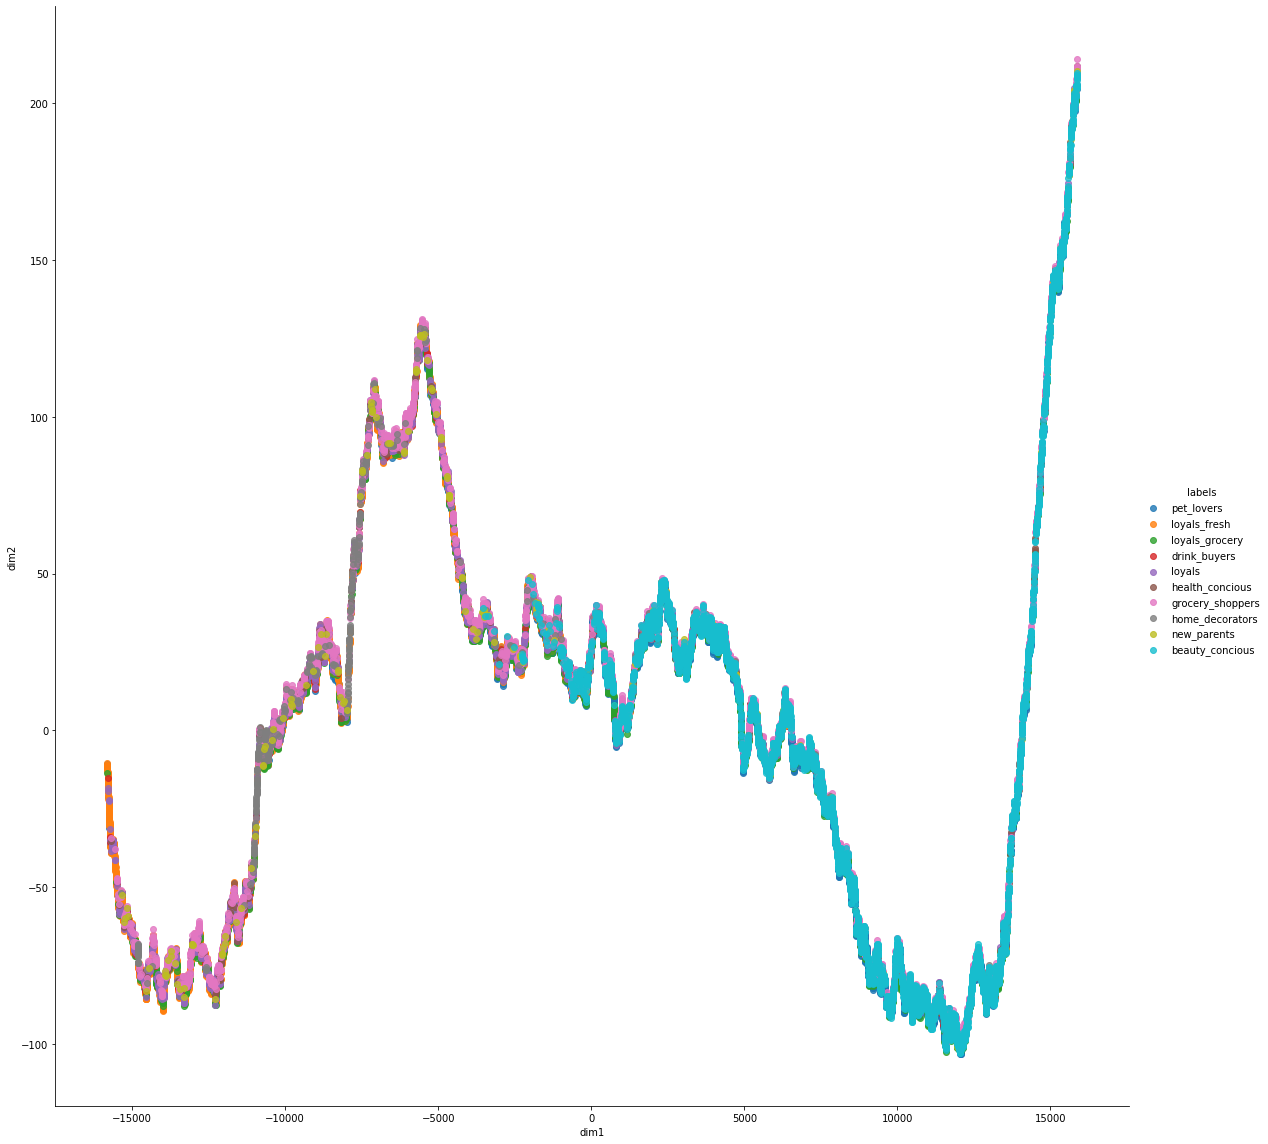

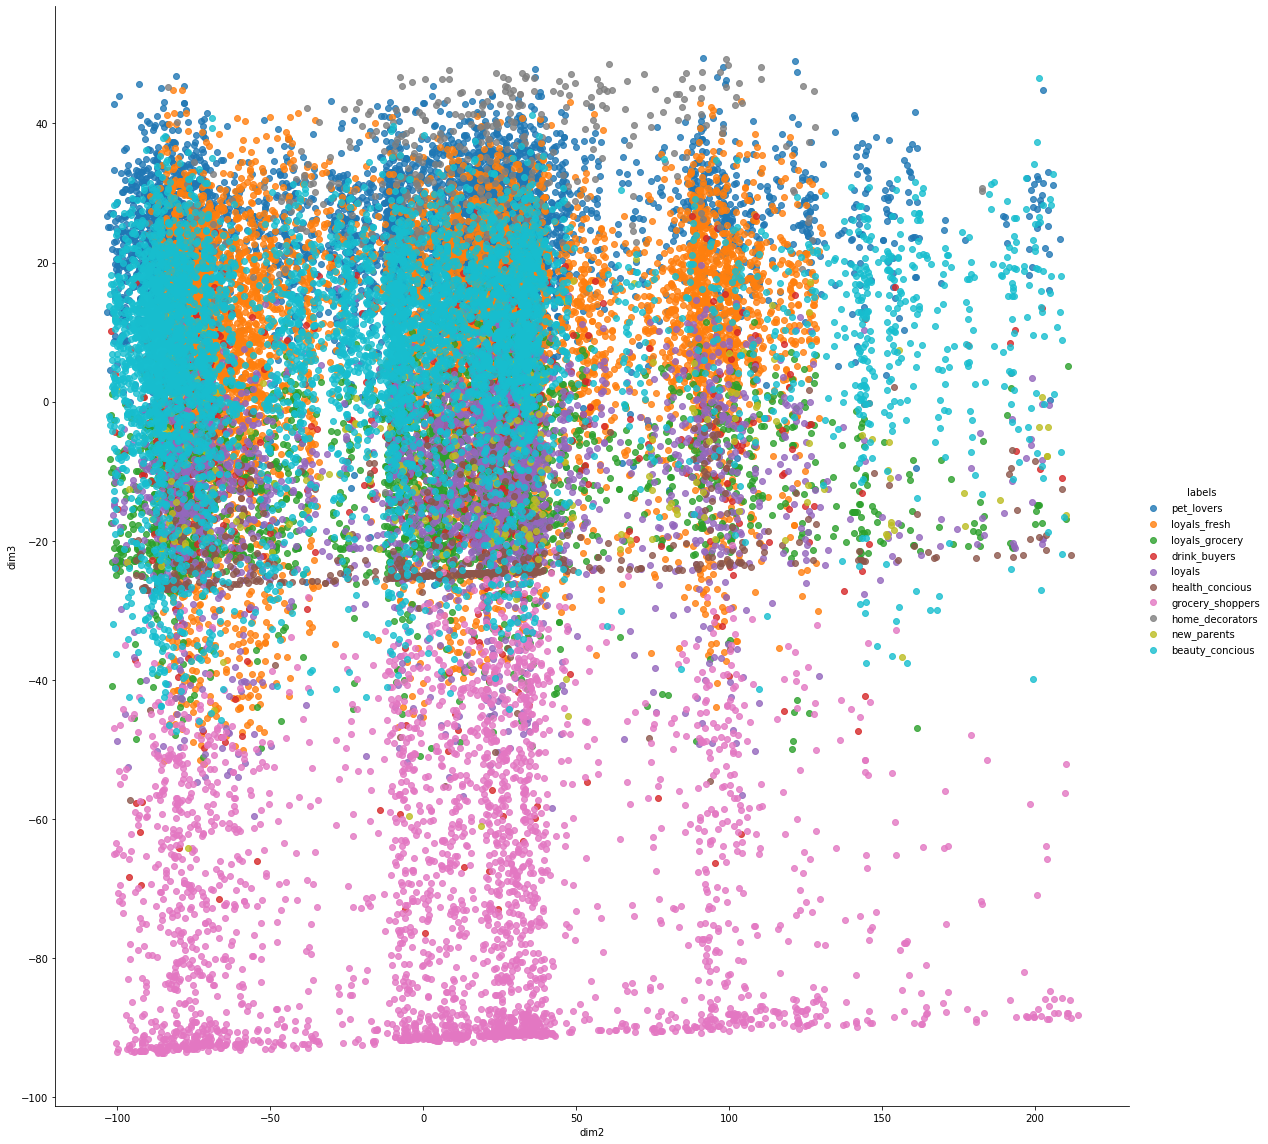

In [73]:
pca_2d_plot_labels(pca, df, frame)


In [74]:
frame.groupby('class')['total_items'].describe()


count       mean        std  min    25%   50%   75%   max
class                                                                       
beauty_concious   5894.0  33.041228  13.863526  1.0  24.00  31.0  42.0  70.0
drink_buyers       576.0  22.111111  11.979177  1.0  14.00  21.0  29.0  69.0
grocery_shoppers  2851.0  11.722553   9.232314  1.0   4.00  10.0  17.0  70.0
health_concious    605.0   7.573554   9.195627  1.0   1.00   3.0  12.0  47.0
home_decorators    433.0  38.789838  18.426523  1.0  24.00  38.0  56.0  70.0
loyals            2550.0  22.954118  11.587449  1.0  15.00  22.0  29.0  69.0
loyals_fresh      7112.0  35.445304  13.808791  1.0  26.00  34.0  44.0  70.0
loyals_grocery    2883.0  20.843913  10.823384  1.0  13.00  20.0  28.0  68.0
new_parents        290.0  19.072414  11.356976  1.0  10.25  18.0  26.0  66.0
pet_lovers        5371.0  34.382796  14.340882  1.0  25.00  33.0  43.0  70.0

In [75]:
frame.groupby('class')['discount%'].describe()


count       mean        std    min       25%      50%  \
class                                                                      
beauty_concious   5894.0   6.375136   7.562954 -11.99    1.5200    4.000   
drink_buyers       576.0   5.392205   8.156605  -5.54    0.4225    2.540   
grocery_shoppers  2851.0   8.013451  10.642883 -23.89    0.0000    2.630   
health_concious    605.0   8.986579  12.461655   0.00    0.0000    5.270   
home_decorators    433.0  93.803949  14.518201  37.59  100.0000  100.000   
loyals            2550.0  13.535471  11.108935 -23.98    4.5325   11.985   
loyals_fresh      7112.0   7.045564   7.722457 -18.06    1.7700    4.550   
loyals_grocery    2883.0   5.347399   8.023901 -65.15    0.2300    3.200   
new_parents        290.0   7.811793   8.974142 -12.79    0.6225    4.510   
pet_lovers        5371.0   4.873454   6.455826   0.00    0.8200    2.780   

                       75%     max  
class                               
beauty_concious     8.4275   63.33  
drink_buyers        6.7125   52.49  
grocery_shoppers   13.3400   60.18  
health_concious     9.9900  100.00  
home_decorators   100.0000  100.00  
loyals             19.9100   86.09  
loyals_fresh        9.5725   60.89  
loyals_grocery      7.6450   77.13  
new_parents        12.3175   42.42  
pet_lovers          6.4100   76.28

In [76]:
frame['class'].value_counts().sort_values(ascending=False)


loyals_fresh        7112
beauty_concious     5894
pet_lovers          5371
loyals_grocery      2883
grocery_shoppers    2851
loyals              2550
health_concious      605
drink_buyers         576
home_decorators      433
new_parents          290
Name: class, dtype: int64

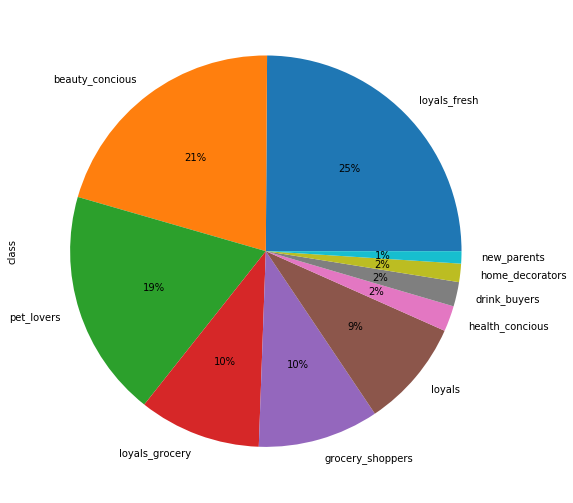

In [77]:
plt.figure(figsize=(9,9))
frame['class'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.0f%%', labels=list(frame['class'].value_counts().sort_values(ascending=False).index))
plt.show()

In [79]:
frame[(frame['discount%']<0).multiply(frame['class']!='drink_buyers')].describe()

total_items   discount%     weekday       Food%      Fresh%  \
count   113.000000  113.000000  113.000000  113.000000  113.000000   
mean     22.327434   -8.385841    3.672566   18.872566    0.283274   
std      14.139258   10.914697    2.114755   20.586863    3.011247   
min       3.000000  -65.150000    1.000000    0.000000    0.000000   
25%      11.000000   -9.380000    2.000000    0.000000    0.000000   
50%      20.000000   -5.310000    3.000000   11.740000    0.000000   
75%      31.000000   -1.520000    6.000000   34.310000    0.000000   
max      66.000000   -0.030000    7.000000   74.900000   32.010000   

          Drinks%       Home%     Beauty%     Health%       Baby%       Pets%  \
count  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000   
mean    50.349469   14.478938    2.559469    0.503982   11.046991    1.905487   
std     28.643739   17.800174    5.835162    2.292184   25.273218    8.620558   
min      5.330000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     27.260000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     43.080000    5.610000    0.000000    0.000000    0.000000    0.000000   
75%     71.030000   26.360000    2.430000    0.000000    0.000000    0.000000   
max    100.000000   74.670000   37.820000   16.720000   86.330000   67.420000   

           labels  
count  113.000000  
mean     2.964602  
std      1.831906  
min      1.000000  
25%      2.000000  
50%      2.000000  
75%      3.000000  
max      9.000000

In [80]:
frame[frame['discount%']<0].shape[0]


119

In [81]:
##-> Only 119 among 30k had to pay an extra charge, that's not a pain killer problem.